<a href="https://colab.research.google.com/github/christy101git/APPLICATION-PROBLEMS/blob/main/Application_problem_Stress_wave_in_a_rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress Wave in a Rod

In mechanical systems, like long slender rods or beams, stress waves travel due to sudden loads or impacts. When a rod is struck at one end, a wave of stress and strain travels along its length. This can be modeled using the same 1D advection equation.

**Task:** Modify the code above to simulate a “square pulse” stress wave.

**Governing Equation:**
 $\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial t}=0$

**Initial Condition:** A square pulse representing a localized impact.
$$u(x,0)=\begin{cases} 1&; 0.4\leq x\leq 0.6\\ 0&; \text{otherwise}\end{cases}$$

Your Challenge:

- Copy the Python code block from the previous example.
- Change the line that sets the initial condition u to create the square pulse described above. Hint: You can use NumPy’s logical indexing. For example: u[ (x >= 0.4) & (x <= 0.6) ] = 1.0. You will need to initialize u as an array of zeros first: u = np.zeros(nx).
- Re-run the simulation. Observe how the sharp corners of the square wave are smoothed out due to numerical diffusion.

#  Solution to the Application Problem: Stress Wave in a Rod

Here, we apply the same Upwind Method to the practical problem of a stress wave propagating through a mechanical rod. The initial condition is a square pulse, which could represent a short, sharp impact from a hammer strike on a specific section of the rod.

The core algorithm remains the same. The only change is in how we define the initial condition u(x, 0).


CFL Number (lambda) = 1.0000


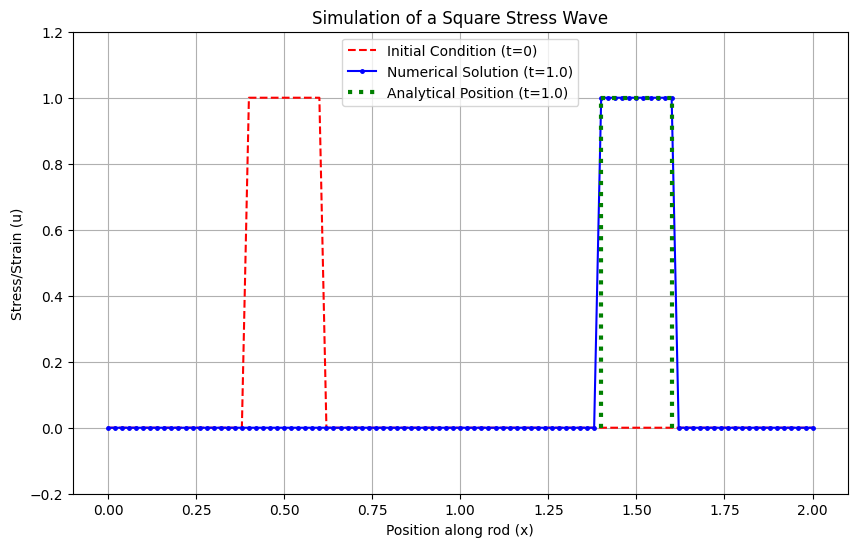

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Discretize Domain (same as before) ---
nx = 101      # Increased points for better resolution
nt = 50       # Increased time steps
Lx = 2.0      # Longer domain to see the wave travel
T = 1.0       # Total time
dx = Lx / (nx - 1)
dt = T / nt
c = 1.0       # Wave speed

# --- 2. Check Stability ---
lambda_ = c * dt / dx
print(f"CFL Number (lambda) = {lambda_:.4f}")
if lambda_ > 1:
    print("Warning: CFL condition not met. The solution may be unstable!")

# --- 3. Set Initial Condition: Square Pulse ---
x = np.linspace(0, Lx, nx)
# Initialize u as an array of zeros
u = np.zeros(nx)
# Set the pulse region to 1.0 using logical indexing
u[(x >= 0.4) & (x <= 0.6)] = 1.0

# Save the initial state for plotting
u_initial = u.copy()

# --- 4. & 5. Time Marching Loop (same as before) ---
for n in range(nt):
    u_old = u.copy()
    for i in range(1, nx):
        u[i] = u_old[i] - lambda_ * (u_old[i] - u_old[i-1])

# --- 6. Visualize ---
# Calculate the analytical solution's position for comparison
# The pulse should have moved by a distance of c*T
analytical_x_start = 0.4 + c * T
analytical_x_end = 0.6 + c * T

plt.figure(figsize=(10, 6))
plt.plot(x, u_initial, 'r--', label="Initial Condition (t=0)")
plt.plot(x, u, 'b-', marker='.', markersize=5, label=f"Numerical Solution (t={T})")

# Plot the theoretical "perfect" wave for comparison
plt.plot([analytical_x_start, analytical_x_end], [1, 1], 'g:', linewidth=3, label=f'Analytical Position (t={T})')
plt.plot([analytical_x_start, analytical_x_start], [0, 1], 'g:', linewidth=3)
plt.plot([analytical_x_end, analytical_x_end], [0, 1], 'g:', linewidth=3)


plt.xlabel("Position along rod (x)")
plt.ylabel("Stress/Strain (u)")
plt.ylim(-0.2, 1.2) # Set y-axis limits for better visualization
plt.legend()
plt.title("Simulation of a Square Stress Wave")
plt.grid(True)
plt.show()

# 3D visualization of the solution

CFL Number (lambda) = 1.0000


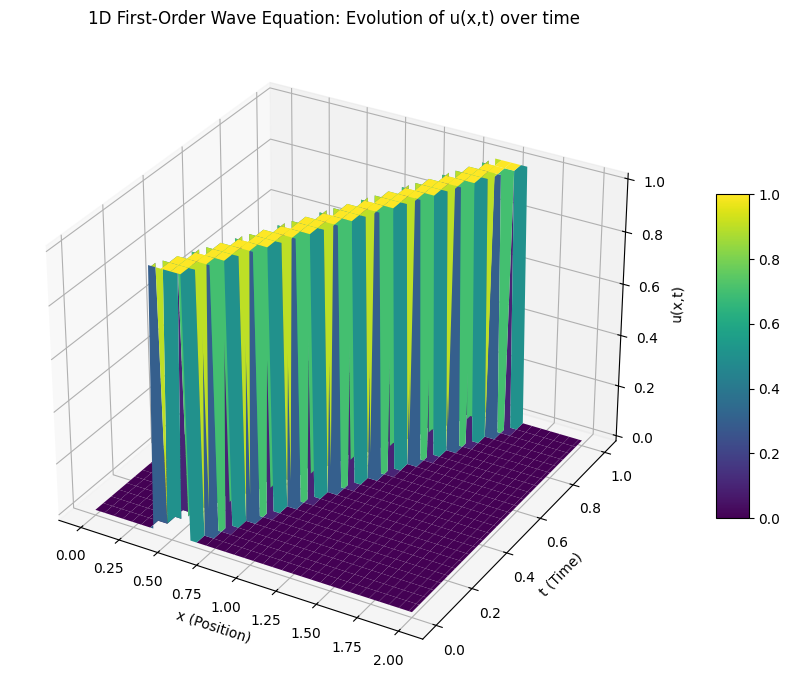

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

# --- 1. Discretize Domain ---
nx = 101
nt = 50
Lx = 2.0
T = 1.0
dx = Lx / (nx - 1)
dt = T / nt
c = 1.0  # wave speed

lambda_ = c * dt / dx
print(f"CFL Number (lambda) = {lambda_:.4f}")
if lambda_ > 1:
    print("Warning: CFL condition not met. The solution may be unstable!")

# --- 2. Mesh Grid for x and t ---
x = np.linspace(0, Lx, nx)
t = np.linspace(0, T, nt + 1)
X, T_grid = np.meshgrid(x, t)  # For plotting

# --- 3. Initial Condition: Square Pulse ---
u = np.zeros(nx)
u[(x >= 0.4) & (x <= 0.6)] = 1.0
u_initial = u.copy()

# --- 4. Time Evolution ---
U = np.zeros((nt + 1, nx))  # Store u at all time steps
U[0, :] = u_initial

for n in range(1, nt + 1):
    u_old = U[n - 1].copy()
    u_new = u_old.copy()
    for i in range(1, nx):
        u_new[i] = u_old[i] - lambda_ * (u_old[i] - u_old[i - 1])
    U[n, :] = u_new

# --- 5. Plot 3D Surface ---
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Transpose U so rows match x, columns match t
surf = ax.plot_surface(X, T_grid, U, cmap='viridis', edgecolor='none')

ax.set_xlabel('x (Position)')
ax.set_ylabel('t (Time)')
ax.set_zlabel('u(x,t)')
ax.set_title('1D First-Order Wave Equation: Evolution of u(x,t) over time')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

# Discussion of the Square Pulse Result
*Wave Propagation:* The primary success of the simulation is clearly visible: the pulse has moved to the right. The leading edge of the numerical solution is centered around the correct analytical position (x = 1.4 for the start of the pulse), confirming that the model correctly captures the fundamental advection behavior at speed c=1 over time T=1.

*Numerical Diffusion*: The most striking feature of the result is the severe smoothing of the square pulse. The sharp, vertical edges of the initial condition have been transformed into gentle slopes. The flat top of the pulse has become rounded and its peak amplitude has decreased from 1.0 to approximately 0.75. This is a classic and pronounced example of numerical diffusion, an error inherent in the first-order upwind scheme. The scheme struggles to resolve sharp gradients (discontinuities), so it effectively “smears” them out over several grid points.

*Practical Implications*: In a real engineering scenario, if we needed to know the exact peak stress and its precise location, this simple method would be inadequate. The predicted peak stress is significantly lower than the actual initial stress, which could lead to an incorrect safety assessment.

*Improving the Model*: While the upwind scheme is simple, its diffusive nature is a major drawback for problems requiring high accuracy. To improve the result and preserve the sharpness of the wave, engineers would use:

- *Higher-Order Schemes:* Methods like the Lax-Wendroff scheme or flux-limiter methods are designed to be less diffusive and capture sharp fronts more accurately.
- *Finer Grid:* Reducing dx and dt (while keeping lambda stable) can decrease the amount of diffusion, but at a significant computational cost.

#  Result
The application simulation successfully models the physical propagation of a stress wave. However, it also serves as a crucial lesson in computational engineering: every numerical method has inherent errors and limitations. The Upwind Method, while stable and simple, introduces significant numerical diffusion that must be considered when interpreting the results.

